La phase précédente de web scraping des données nous a permis de récupérer des données provenant de différentes sources internet et des les enregistrer sous la forme d'un data frame Pandas.

# Preprocessing

**Dans cette partie, nous allons tenter de mieux comprendre nos données et de les préparer pour la partie suivante à savoir la phase d'apprentissage et de prédiction.**

On commence par importer toutes les libraries et fonctions nécéssaires à notre analyse.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [3]:
from script import convert_float, drop_inutile, select_features_kbest, data_frame_final, robuste_std, melange,multiplot2,  multiplot
import script as sc

On importe également notre jeu de données enregistré à la phase précédente de webscraping.

In [4]:
df = pd.read_csv("df.csv")

La phase de webscraping nous a permis d'extraire 21 variables :
* *pop_2012* : la population en 2012
* *pop_2014* : la population en 2014
* *pop_2016* : la population en 2016
* *pop_2017* : la population en 2017
* *pop_2018* : la population en 2018
* *superficie* : la superficie en km^2
* *densite* : la densité de population en km^2
* *nb_commune* : le nombre de communes
* *pop_municipale* : la population municipale
* *hab_m* : le nombre d'habitants au m^2
* *pib_2015* : le pib en 2015
* *pib_2005* : le pib en 2005
* *pib_2000* : le pib en 2000
* *décla* : la moyenne mensualisée des montants déclarés aux impôts
* *taxe_om* : le taux de taxe communale sur les ordures ménagères
* *impot* : le montant moyen d'impôt sur le revenu
* *nom* : le nom du département
* *code* : le code du département
* *r_moyen* : le revenu moyen annuel

On peut observer succintement un extrait du jeu de données. 

In [5]:
display(df.head())

,code_x,nom,pop_2012,pop_2014,pop_2016,pop_2017,pop_2018,superficie,densite,nb_commune,...,hab_m,pib_2015,pib_2005,pib_2000,décla,code_y,rmoyen,code,taxe_om,impot
0,59,N o r d,2587128,2603472,2603723,2604361,2604361,"5742,8","453,8",650,...,3968,NaN,23567,19794,2427,59,24887,59,"18,07",3414
1,75,P a r i s,2240621,2220445,2190327,2187526,2187526,"105,4","20720,0",1,...,2249975,96400.0,75439,67502,4007,75,48301,75,"13,50",11750
2,13,B o u c h e s - d u - R h ô n e,1984784,2006069,2019717,2024162,2024162,5087,"399,9",119,...,16604,34200.0,27818,23521,2570,13,26751,13,"21,06",3996
3,93,S e i n e - S a i n t - D e n i s,1538726,1571028,1606660,1623111,1623111,"236,2","6918,1",40,...,38248,38900.0,27420,23305,2398,93,21768,93,"21,91",3095
4,92,H a u t s - d e - S e i n e,1586434,1597770,1603268,1609306,1609306,"175,6","9199,6",36,...,43934,97500.0,73277,62244,3885,92,45966,92,"16,04",9162


On réalise dès à présent quelques manipulations de preprocessing :
* On convertit certaines variables en float (*superficie, densite, taxe_om*) : Ces nombres étaient stockés comme des chaînes de caractère car pandas ne considère pas un nombre formaté comme cela "##,#" comme un float. On commence d'abord par transformer les virgules en points puis on applique une fonction de conversion. 

``def convert_float(df):
    df['densite'] = [x.replace(',', '.') for x in df['densite']]
    df['densite'] = df['densite'].astype(float)
    df['superficie'] = [x.replace(',', '.') for x in df['superficie']]
    df['superficie'] = df['superficie'].astype(float)
    df['taxe_om'] = [x.replace(',', '.') for x in df['taxe_om']]
    df['taxe_om'] = df['taxe_om'].astype(float)
    return df``


* On se débarrasse de la variables *pib_2015* qui compte trop de NAs et d'autres variables inutiles : Comme nous avons aussi les variables *pib_2000* et *pib_2005*, elle ne nous manquera pas. Même constat pour le code du département car nous n'en avons pas besoin. 

``def drop_inutile(df):
    df.drop(['pib_2015'], axis='columns', inplace=True)
    df.drop(['code_y'], axis='columns', inplace=True)
    df.drop(['code_x'], axis='columns', inplace=True)
    df.drop(['code'], axis='columns', inplace=True)
    return df``


* On transforme nos données selon RobustScaler (choisi car nous avons des valeurs extrêmes) : Ce transformateur s'applique à toutes nos données et est plus adapté ici. Il transforme les données de la manière suivante :$$X_scaled=\frac{X-mediane}{IQR}$$ avec $IQR$ l'écart entre le premier et le troisième quartile. On utilise la fonction suivante :

``def robuste_std(df):
    df[['nom des colonnes à transformer']] = RobustScaler().fit_transform(df[['nom des colonnes à transformer']])
    return pd.DataFrame(df)``

* On mélange notre jeu de données car il est présentement classé par ordre décroissant de population, ce qui peut nous causer des problèmes ultérieurement : La fonction est la suivante :

``def melange(df):
    df_shuffled=sklearn.utils.shuffle(df, random_state=4)
    return df_shuffled``
    
On utilise un système de pipeline afin de réaliser toutes ces transformations de manière successive.

In [6]:
new_df=(
    df
    .pipe(sc.convert_float)
    .pipe(sc.drop_inutile)
    .pipe(sc.robuste_std)
    .pipe(sc.melange)
)

Le data frame est totalement exploitable dès à présent. On peut commencer par observer rapidement nos données sous la forme de nuages de points. Les variables sont représentées par rapport au revenu moyen annuel.

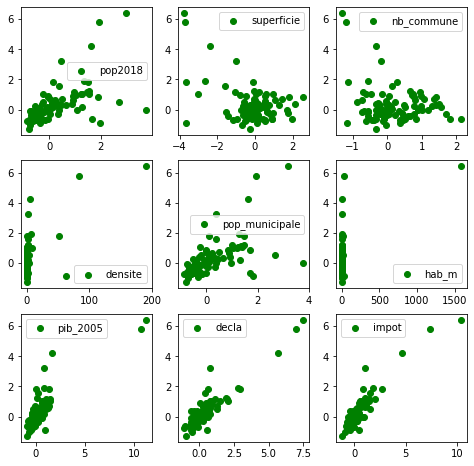

In [7]:
multiplot(df)

La plupart des variables laissent apparaître des relations croissantes avec notre variable d'intérêt sauf peut-être la densité, la superficie et le nombre de communes pour lesquelles la relation n'est pas clairement positive à vue d'oeil.

La variable *hab_m* laisse apparaître la présence d'une valeur extrême. Observons cela de plus près.

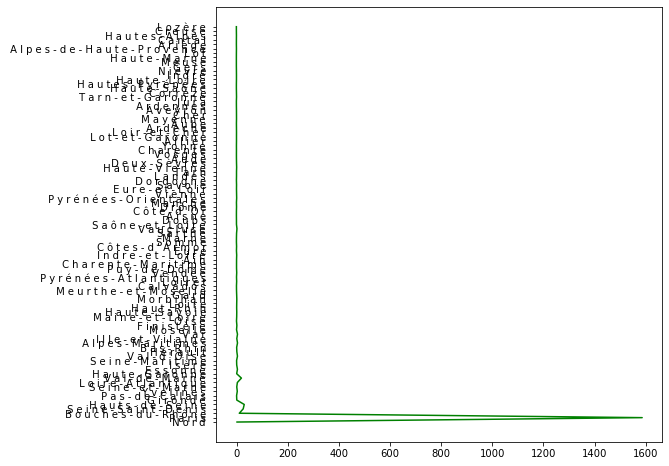

In [8]:
plt.plot(df['hab_m'], df['nom'],color='green')

C'est donc la ville de Paris qui est une valeur extrême pour le nombre d'habitants au mètre carré et cela n'est pas surprenant.

In [9]:
new_df[new_df['hab_m']==new_df['hab_m'].max()]

,nom,pop_2012,pop_2014,pop_2016,pop_2017,pop_2018,superficie,densite,nb_commune,pop_municipale,hab_m,pib_2005,pib_2000,décla,rmoyen,taxe_om,impot
1,P a r i s,2240621,2220445,2190327,2187526,2.97674,-3.761082,190.981537,-1.320463,3.164478,1585.861072,11.217104,11.838666,7.515152,6.426018,-0.234899,10.373639


On peut observer un sommaire des données. On voit qu'elles ont bien été échelonnées sauf pour les variables redondantes que l'on a pas pris la peine de transformer. Effectivement, on sait qu'on ne va pas les garder car il y aurait trop d'autocorrellation. 

In [10]:
new_df.describe()

,pop_2012,pop_2014,pop_2016,pop_2017,pop_2018,superficie,densite,nb_commune,pop_municipale,hab_m,pib_2005,pib_2000,décla,rmoyen,taxe_om,impot
count,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,6.687950e+05,6.754757e+05,6.799235e+05,6.817020e+05,0.233389,-0.128206,4.662778,0.173278,0.221182,18.687294,0.346628,0.308592,0.401218,0.318896,0.109964,0.386032
std,4.924620e+05,4.982734e+05,5.022013e+05,5.044471e+05,0.919016,1.199260,23.212821,0.721228,0.910412,166.177629,1.720922,1.764777,1.405412,1.222947,0.778994,1.557110
min,7.688900e+04,7.636000e+04,7.642200e+04,7.660100e+04,-0.869001,-3.761082,-0.635417,-1.320463,-0.872190,-0.590268,-0.931329,-1.100710,-1.082251,-1.293454,-1.456376,-1.219484
25%,3.151520e+05,3.163255e+05,3.170335e+05,3.178660e+05,-0.429457,-0.480496,-0.292906,-0.314672,-0.431279,-0.280324,-0.383557,-0.403834,-0.337662,-0.355748,-0.432886,-0.378223
50%,5.463140e+05,5.543740e+05,5.550230e+05,5.535950e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.557965e+05,8.621175e+05,8.658955e+05,8.667655e+05,0.570543,0.519504,0.707094,0.685328,0.568721,0.719676,0.616443,0.596166,0.662338,0.644252,0.567114,0.621777
max,2.587128e+06,2.603472e+06,2.603723e+06,2.604361e+06,3.736141,2.566172,190.981537,2.131274,3.776127,1585.861072,11.217104,11.838666,7.515152,6.426018,2.689038,10.373639


On s'intéresse à présent aux liens entre nos variables. Les variables de population sont très corrélées entre elles, on veillera donc à ne pas toutes les garder. 

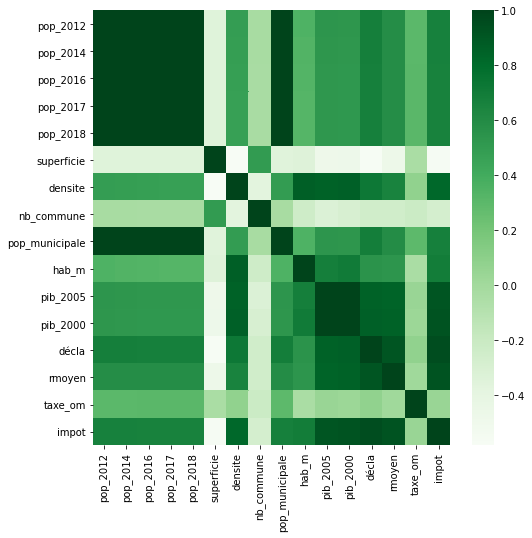

In [11]:
corrMatrix = new_df.corr()
sn.heatmap(corrMatrix, cmap="Greens")
plt.show()

Ce graphique nous permet aussi d'observer que les variables issues d'une même source sont souvent beaucoup corrélées.

Nous allons maintenant sélectionner les variables que l'on va garder pour la phase d'apprentissage. On utilise la fonction SelectKBest selon le le classificateur du f_score avec un objectif de sept variables. On peut observer l'importance des variables dans le graphique suivant. On se fixe un nombre maximal de sept variables. Le graphique suivant nous permet d'apprécier le score de chaque variable.

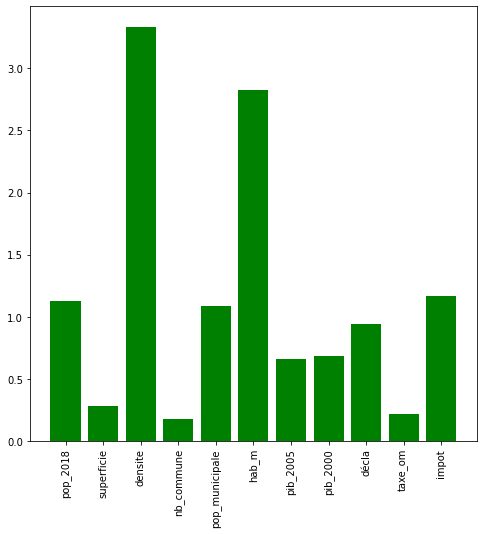

In [12]:
scores, selected=select_features_kbest(new_df)

On obtient donc la sélection de variable et on crée le data frame final selon l'estimateur de SelectKBest.

In [13]:
df_final=data_frame_final(selected, new_df)

/home/melissaznf/python M2/script.py:570: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['revenu_moyen']=v
/home/melissaznf/python M2/script.py:571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['departement']=w


Nous obtenons donc le dataframe final suivant qui sera enregistré au format csv et réutilisé dans la suite de nos analyses.
Les variables sélectionnées sont :
* *pop_2018*
* *densite*
* *pop_municipale*
* *hab_m*
* *pib_2000*
* *décla*
* *impot*

et bien évidemment *revenu_moyen*.

In [14]:
df_final

,pop_2018,densite,pop_municipale,hab_m,pib_2000,décla,impot,revenu_moyen
departement,,,,,,,,
I s è r e,1.284619,0.800611,1.242093,0.744711,0.865181,1.506494,0.645272,1.056381
A u b e,-0.443752,-0.294850,-0.450764,-0.368124,0.272874,-0.207792,0.356447,-0.085534
P u y - d e - D ô m e,0.182451,-0.013512,0.165045,0.090268,0.616706,0.627706,0.175358,0.312981
V a l - d e - M a r n e,1.520007,51.993985,1.462224,19.148801,1.203286,2.948052,2.720917,1.806381
E u r e - e t - L o i r,-0.219279,-0.090787,-0.215903,-0.107898,0.107556,0.735931,0.182235,0.517327
...,...,...,...,...,...,...,...,...
A r d e n n e s,-0.510141,-0.288464,-0.489568,-0.432299,-0.378439,-0.086580,-0.287679,-0.668042
P a r i s,2.976740,190.981537,3.164478,1585.861072,11.838666,7.515152,10.373639,6.426018
M a y e n n e,-0.448443,-0.222849,-0.445127,-0.033850,0.334869,-0.445887,-0.642980,-0.030253


Nous obtenons donc finalement un jeu de données où ces dernières ont été nettoyées, on a choisi les meilleures variables et on a appliqué un échelonnage robuste afin de pallier au problème des valeurs extrêmes et de faciliter les calculs.

In [15]:
filename = 'df_final.csv'
df_final.to_csv(filename, index=True, encoding='utf-8')

Au cours de cette phase, nous avons réussi à rendre nos données exploitables et à les connaître un peu mieux. 
La prochaine phase est la phase d'apprentissage afin de trouver un modèle qui prédit bien les revenu moyen à partir des données qu'on lui fournit.